#  Data Analytics and Machine Learning of the Data space in Granular Flow
    *Developing the machine learning model with 100 time_steps

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)

# 1.0 Combining the data gathered for each time step into a single csv file

In [3]:
granular_flow_data_paths=[]

tot=np.arange(100,10100,100)
for i in range(tot.size+1):
    if i==0:
        pass
    else:
        a=[f"""../Tables (Data set)/XYZ_Internal_Table_table_{i*100}.csv"""]
        granular_flow_data_paths+=a



granular_flow_dataset = []
for datapath in granular_flow_data_paths:
    df=pd.read_csv(datapath)
    granular_flow_dataset.append(df)


In [4]:
len(granular_flow_dataset)

100

In [5]:
y=pd.concat(granular_flow_dataset)
Combined_flow_data=y.to_csv('./Combined flow data(#100).csv')
Combined_flow_data

# 2.0 Working With the Saved file

## 2.1 Reading (Loading) the combined saved data

In [6]:

Granular_flow_data= pd.read_csv('./Combined flow data(#100).csv')
Granular_flow_data

,Unnamed: 0,Time (s),Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s),X (m),Y (m),Z (m)
0,0,0.02,-0.113685,0.032540,0.014828,0.576229,7.599137e-06,-0.156682,0.597151,0.010824,0,1128,5.851,-0.113685,0.032540,0.014828
1,1,0.02,-0.113686,0.025651,0.007872,0.575964,-3.384995e-05,-0.156740,0.596911,0.006975,0,1128,5.851,-0.113686,0.025651,0.007872
2,2,0.02,-0.113689,0.024866,0.018086,0.576129,8.063311e-05,-0.156886,0.597108,0.010824,0,1128,5.851,-0.113689,0.024866,0.018086
3,3,0.02,-0.113687,0.038670,0.008284,0.576709,-4.113741e-04,-0.155926,0.597417,0.034522,0,1128,5.851,-0.113687,0.038670,0.008284
4,4,0.02,-0.113689,0.026663,0.013483,0.576153,3.311456e-05,-0.156845,0.597121,0.010824,0,1128,5.851,-0.113689,0.026663,0.013483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641417,30668,2.00,-0.117250,0.034019,0.007598,0.538821,-1.702028e-07,-0.108070,0.549552,0.085416,0,30673,10843.272,-0.117250,0.034019,0.007598
2641418,30669,2.00,-0.117254,0.029126,0.007375,0.538780,-1.942652e-07,-0.108018,0.549502,0.085416,0,30673,10843.272,-0.117254,0.029126,0.007375
2641419,30670,2.00,-0.117258,0.035297,0.015387,0.538740,-2.003241e-08,-0.107967,0.549452,0.049209,0,30673,10843.272,-0.117258,0.035297,0.015387
2641420,30671,2.00,-0.117258,0.026099,0.002817,0.538740,-4.235156e-08,-0.107966,0.549452,0.163638,0,30673,10843.272,-0.117258,0.026099,0.002817


## Finding patterns in the data using correlation matrix

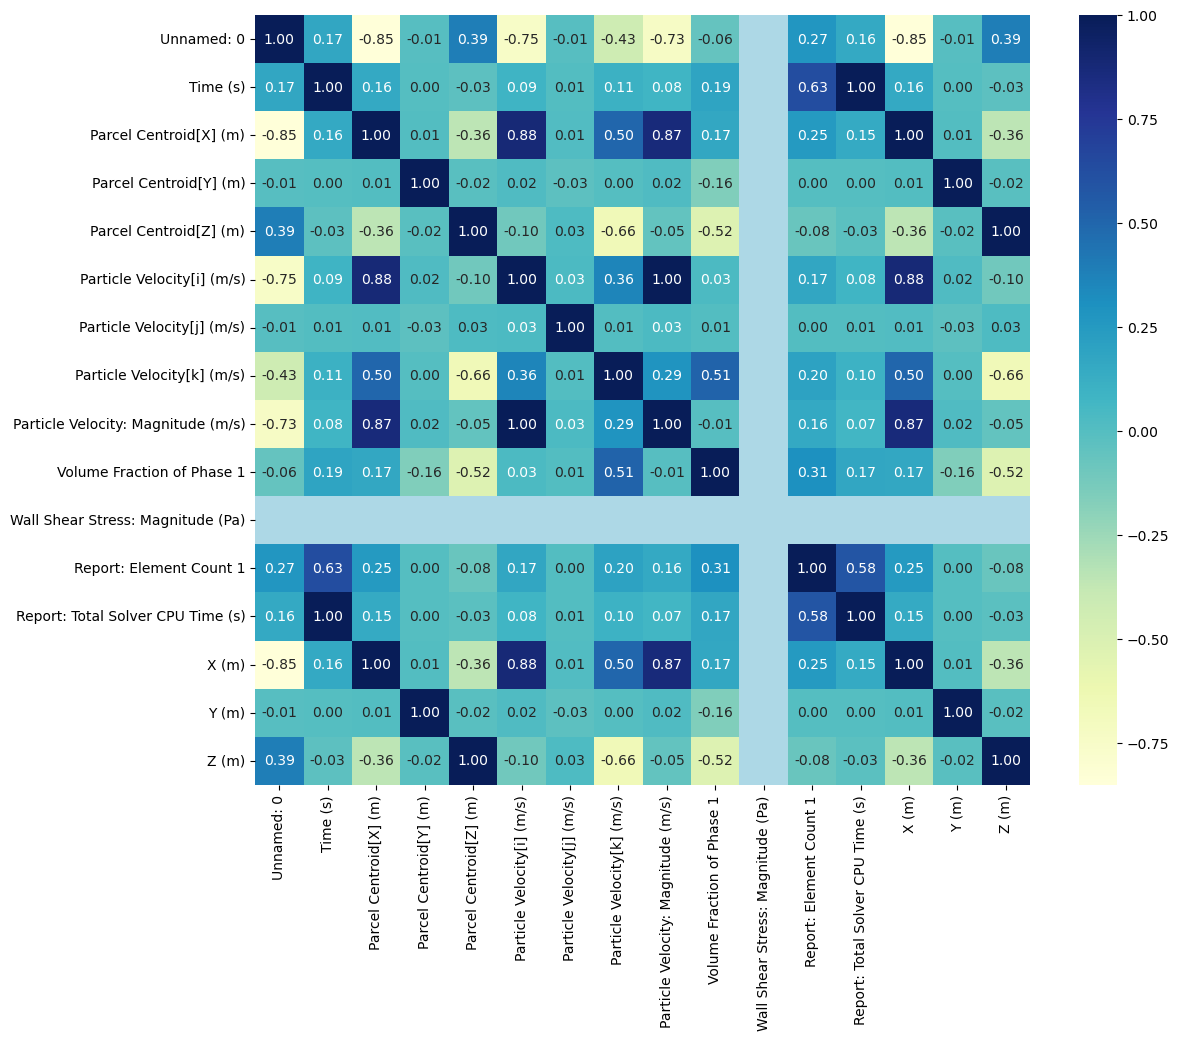

In [7]:
import seaborn as sns

corr_matrix =Granular_flow_data.corr()

fig, ax_corr_Matrix=plt.subplots(figsize=(12.5,10))

color = plt.get_cmap('YlGnBu')   # default color
color.set_bad('lightblue')  

ax =sns.heatmap(corr_matrix, 
                annot=True,
                fmt=".2f",
                cmap=color
               )
fig.savefig('./Correlation_matrix_for_the_data(#100).png', bbox_inches='tight', dpi=1200)

## 2.2 Splitting the data

In [8]:

X=Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)', 'X (m)',	'Y (m)',	'Z (m)'], axis=1)
y= Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]


In [9]:
X

,Unnamed: 0,Time (s),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s)
0,0,0.02,0.576229,7.599137e-06,-0.156682,0.597151,0.010824,0,1128,5.851
1,1,0.02,0.575964,-3.384995e-05,-0.156740,0.596911,0.006975,0,1128,5.851
2,2,0.02,0.576129,8.063311e-05,-0.156886,0.597108,0.010824,0,1128,5.851
3,3,0.02,0.576709,-4.113741e-04,-0.155926,0.597417,0.034522,0,1128,5.851
4,4,0.02,0.576153,3.311456e-05,-0.156845,0.597121,0.010824,0,1128,5.851
...,...,...,...,...,...,...,...,...,...,...
2641417,30668,2.00,0.538821,-1.702028e-07,-0.108070,0.549552,0.085416,0,30673,10843.272
2641418,30669,2.00,0.538780,-1.942652e-07,-0.108018,0.549502,0.085416,0,30673,10843.272
2641419,30670,2.00,0.538740,-2.003241e-08,-0.107967,0.549452,0.049209,0,30673,10843.272
2641420,30671,2.00,0.538740,-4.235156e-08,-0.107966,0.549452,0.163638,0,30673,10843.272


In [10]:
y

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.113685,0.032540,0.014828
1,-0.113686,0.025651,0.007872
2,-0.113689,0.024866,0.018086
3,-0.113687,0.038670,0.008284
4,-0.113689,0.026663,0.013483
...,...,...,...
2641417,-0.117250,0.034019,0.007598
2641418,-0.117254,0.029126,0.007375
2641419,-0.117258,0.035297,0.015387
2641420,-0.117258,0.026099,0.002817


## 2.3 Checking if there is any missing value in our data
            * If there is any non-numerical value, we perform feature encoding
            * And/ or if there is any missing value, we perform imputation
            * If no missing value, then we continue to building the machine Learning Model

In [11]:
X.isna().sum()

Unnamed: 0                            0
Time (s)                              0
Particle Velocity[i] (m/s)            0
Particle Velocity[j] (m/s)            0
Particle Velocity[k] (m/s)            0
Particle Velocity: Magnitude (m/s)    0
Volume Fraction of Phase 1            0
Wall Shear Stress: Magnitude (Pa)     0
Report: Element Count 1               0
Report: Total Solver CPU Time (s)     0
dtype: int64

In [12]:
y.isna().sum()

Parcel Centroid[X] (m)    0
Parcel Centroid[Y] (m)    0
Parcel Centroid[Z] (m)    0
dtype: int64

# 3.0 Building and Training the Machine Learning Model for our Data

In [13]:
from sklearn.ensemble import RandomForestRegressor

model1 =RandomForestRegressor(n_estimators=90)
model1.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=90)>

In [14]:
%%time

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                   test_size=0.2)

model1.fit(X_train, y_train)

CPU times: total: 36min 54s
Wall time: 37min 29s


RandomForestRegressor(n_estimators=90)

## 3.1 Predicting with our model

In [15]:
y_preds=model1.predict(X_test)
  
y_preds


array([[ 0.02931952,  0.03494501,  0.0023466 ],
       [-0.04845363,  0.03514172,  0.00715939],
       [ 0.00894774,  0.02616653,  0.0053462 ],
       ...,
       [ 0.00174136,  0.03558545,  0.00069888],
       [-0.05864979,  0.02845735,  0.00215667],
       [ 0.02190922,  0.034998  ,  0.00359932]])

In [16]:
y_preds=pd.DataFrame(y_preds, columns=['Parcel Centroid[X] (m)',	'Parcel Centroid[Y] (m)',	'Parcel Centroid[Z] (m)'])
y_preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,0.029320,0.034945,0.002347
1,-0.048454,0.035142,0.007159
2,0.008948,0.026167,0.005346
3,0.019014,0.024825,0.004230
4,-0.067198,0.032203,0.008307
...,...,...,...
528280,-0.080161,0.032603,0.009480
528281,-0.050342,0.034435,0.003297
528282,0.001741,0.035585,0.000699
528283,-0.058650,0.028457,0.002157


In [17]:
y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
412383,0.031502,0.033440,0.002208
541694,-0.049162,0.029499,0.007040
2308287,0.007145,0.025976,0.005395
2551475,0.017912,0.026251,0.003920
1094681,-0.066240,0.033535,0.008997
...,...,...,...
179283,-0.079945,0.034668,0.009816
101560,-0.049620,0.037336,0.003339
2305778,0.000587,0.034223,0.000501
1705144,-0.057399,0.027527,0.003134


## 3.2 Scoring our model

In [18]:
model1.score(X_train, y_train)

0.9840213739698179

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error, 
          
         }
model1_scores={}

for key,value in metrics.items():
    model1_scores[key]=value(y_test, y_preds)

    
model1_scores

{'r-squared': 0.88625952668291,
 'Mean absolute error (MAE)': 0.0013891598366113965,
 'Mean squared error(MSE)': 4.072962682930386e-06}

In [20]:
score100_table= pd.DataFrame(model1_scores.values(), index=model1_scores.keys(), columns=["Values"])
score100_table

,Values
r-squared,0.886260
Mean absolute error (MAE),0.001389
Mean squared error(MSE),0.000004


In [21]:
score100_table.to_csv('#100scores.csv')

# 4.0 Plotting the Data
Plotting at the first time-index of the test data This is equivalent to the zeroth index
We can do the same for other indexes

In [22]:
actual_Xi = y_test.iloc[:, :1]
actual_Xj=y_test.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

predicted_Xi = y_preds.iloc[:, :1]
predicted_Xj = y_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


## 4.2 Separate plots of the Actual Granules Position and the Predicted Granules Position

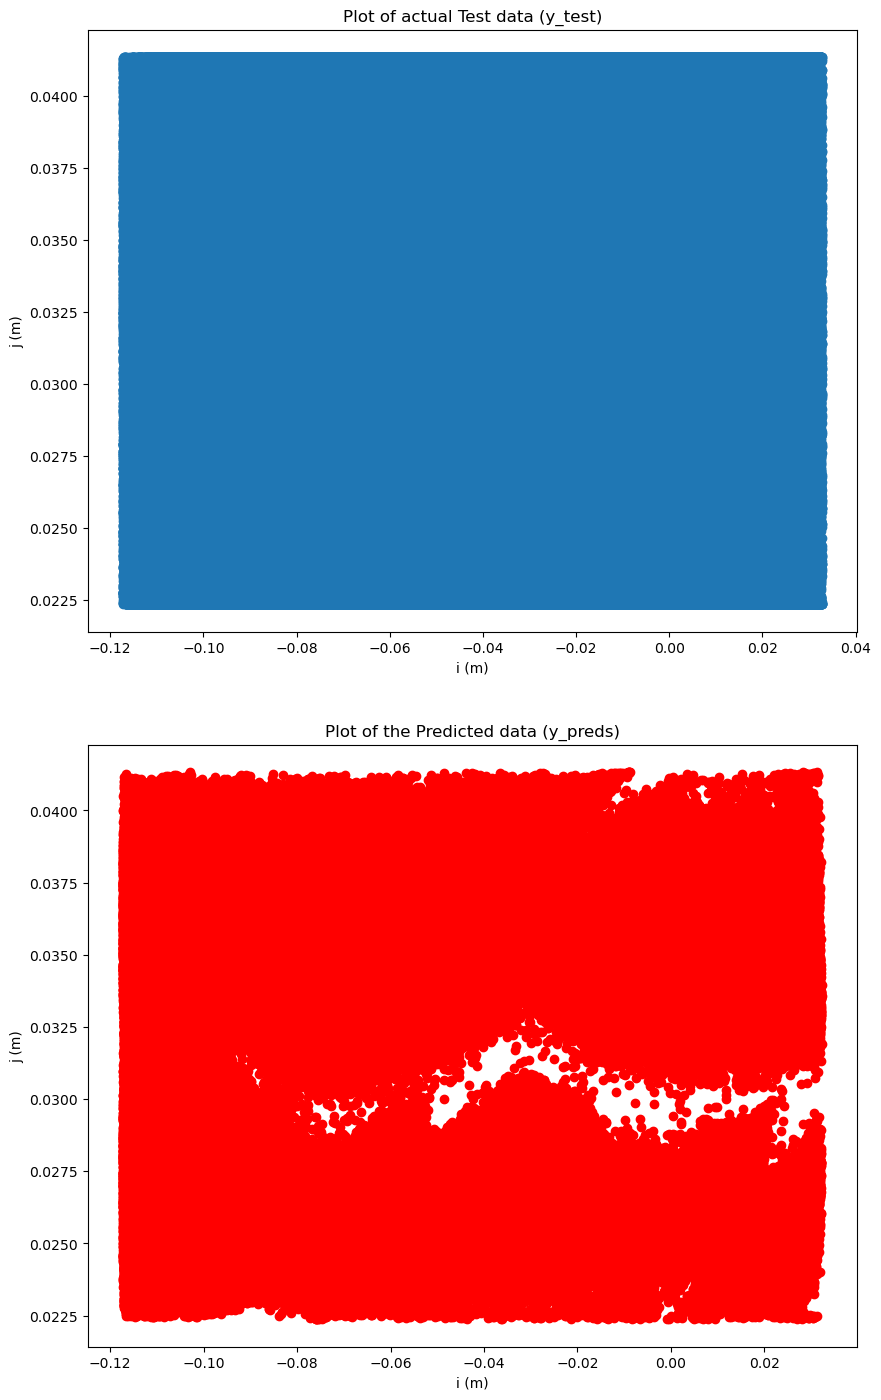

In [23]:
#Plotting the actual and Predicted positions 
# Plot the actual and predicted positions
#plt.scatter(actual_Xi, actual_Xj, color='blue', label='Actual')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,15))

ax1.scatter(actual_Xi, actual_Xj)
ax2.scatter(predicted_Xi, predicted_Xj, color='red')

ax1.set(title="Plot of actual Test data (y_test)", 
              xlabel='i (m)',
              ylabel='j (m)'
             )
fig.tight_layout(pad=5)

ax2.set(title= "Plot of the Predicted data (y_preds)", 
        xlabel= 'i (m)',
        ylabel='j (m)'
       )

plt.savefig("./Separate plots of Actual and Predicted granules Position(#100).png", dpi=1200)

## 4.3 Plotting the Actual Granules Position against the Predicted Granules Position

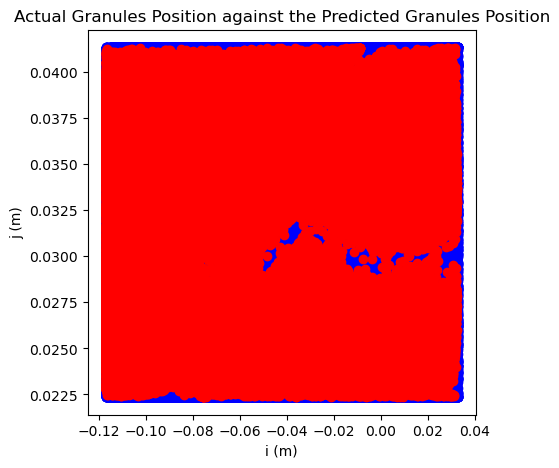

In [24]:
fig, ax3 =plt.subplots(1,1,figsize=(5,5))

ax3.scatter(actual_Xi, actual_Xj, color ='blue')

ax3.scatter(predicted_Xi, predicted_Xj, color='red')

ax3.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted(#100).png', dpi=1200)

In [25]:
## 4.3 Plot of the Actual against the Predicted Granules position of the first 500 granules 

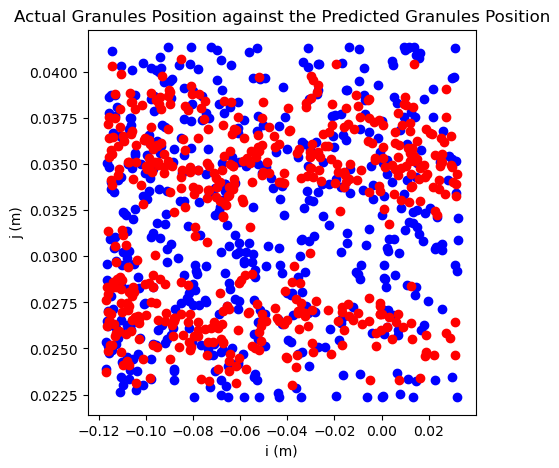

In [26]:
fig, ax4 =plt.subplots(1,1,figsize=(5,5))
plt.scatter(actual_Xi[:500], actual_Xj[:500], color ='blue')
plt.scatter(predicted_Xi[:500], predicted_Xj[:500], color='red')

ax4.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted(#100).png', dpi=1200)

# 5.0 Using Linear Regression Model

In [27]:
%%time

from sklearn.linear_model import LinearRegression

model2=LinearRegression()

model2.get_params
model2.fit(X_train, y_train)


CPU times: total: 1.77 s
Wall time: 1.78 s


LinearRegression()

## 5.1 Making Prediction

In [28]:
yLinear_Preds=model2.predict(X_test)
yLinear_Preds

array([[ 0.01948815,  0.03265657,  0.00707624],
       [-0.04585043,  0.03119339,  0.0061401 ],
       [ 0.00403521,  0.03104953,  0.00397579],
       ...,
       [ 0.00663659,  0.03250792,  0.00083009],
       [-0.05352953,  0.03098448,  0.0047603 ],
       [ 0.01722162,  0.03279783,  0.00346996]])

In [29]:
yLinear_Preds=pd.DataFrame(yLinear_Preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yLinear_Preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,0.019488,0.032657,0.007076
1,-0.045850,0.031193,0.006140
2,0.004035,0.031050,0.003976
3,0.015080,0.030095,0.004257
4,-0.063723,0.031261,0.007058
...,...,...,...
528280,-0.077138,0.030881,0.006350
528281,-0.045392,0.031492,0.008104
528282,0.006637,0.032508,0.000830
528283,-0.053530,0.030984,0.004760


In [30]:
 y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
412383,0.031502,0.033440,0.002208
541694,-0.049162,0.029499,0.007040
2308287,0.007145,0.025976,0.005395
2551475,0.017912,0.026251,0.003920
1094681,-0.066240,0.033535,0.008997
...,...,...,...
179283,-0.079945,0.034668,0.009816
101560,-0.049620,0.037336,0.003339
2305778,0.000587,0.034223,0.000501
1705144,-0.057399,0.027527,0.003134


## 5.2 Scoring the Linear Regression based model

In [31]:
model2.score(X_train, y_train)

0.5530048483735288

In [32]:
model2.score(X_test, y_test)

0.5535297387096006

In [33]:
model2_scores={}

for key,value in metrics.items():
    model2_scores[key]=value(y_test, yLinear_Preds)

    
model2_scores

score100_table['LinearRegression']= np.array(list(model2_scores.values()))
score100_table

,Values,LinearRegression
r-squared,0.886260,0.553530
Mean absolute error (MAE),0.001389,0.003346
Mean squared error(MSE),0.000004,0.000018


In [34]:
model2_scores

{'r-squared': 0.5535297387096006,
 'Mean absolute error (MAE)': 0.0033456526332714975,
 'Mean squared error(MSE)': 1.8457236273240583e-05}

## 5.3 Plots of the Actual vs  Predicted Granule Position Using the Linear Regression Model

In [35]:
LR_Pred_Xi=yLinear_Preds.iloc[:,:1]
LR_Pred_Xj=yLinear_Preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

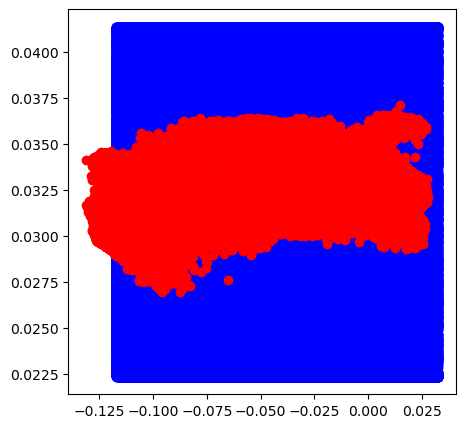

In [36]:
fig, ax5= plt.subplots(figsize=(5,5))

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')

plt.savefig('./LinearRegression_model(#100).png', dpi=1200)

# 6.0 Using Ridge Regression

In [37]:
%%time

from sklearn.linear_model import Ridge

model3= Ridge()

model3.get_params

model3.fit(X_train, y_train)

CPU times: total: 453 ms
Wall time: 245 ms


Ridge()

In [38]:
yRidge_preds=model3.predict(X_test)
yRidge_preds

array([[ 0.01949836,  0.03265729,  0.00707914],
       [-0.04586458,  0.03119333,  0.00613501],
       [ 0.00404134,  0.03105028,  0.0039779 ],
       ...,
       [ 0.00662186,  0.03250623,  0.00082536],
       [-0.05355782,  0.03098306,  0.00475113],
       [ 0.0172484 ,  0.03279897,  0.00347881]])

In [39]:
yRidge_preds=pd.DataFrame(yRidge_preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yRidge_preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,0.019498,0.032657,0.007079
1,-0.045865,0.031193,0.006135
2,0.004041,0.031050,0.003978
3,0.015022,0.030092,0.004238
4,-0.063743,0.031260,0.007051
...,...,...,...
528280,-0.077156,0.030879,0.006346
528281,-0.045429,0.031489,0.008094
528282,0.006622,0.032506,0.000825
528283,-0.053558,0.030983,0.004751


In [40]:
y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
412383,0.031502,0.033440,0.002208
541694,-0.049162,0.029499,0.007040
2308287,0.007145,0.025976,0.005395
2551475,0.017912,0.026251,0.003920
1094681,-0.066240,0.033535,0.008997
...,...,...,...
179283,-0.079945,0.034668,0.009816
101560,-0.049620,0.037336,0.003339
2305778,0.000587,0.034223,0.000501
1705144,-0.057399,0.027527,0.003134


In [41]:
model3.score(X_train, y_train)

0.5530016147043105

In [42]:
model3.score(X_test, y_test)

0.5535259805820036

In [43]:
model3_scores={}

for key,value in metrics.items():
    model3_scores[key]=value(y_test, yRidge_preds)

    
model3_scores

score100_table['RidgeRegression']= np.array(list(model3_scores.values()))
score100_table

,Values,LinearRegression,RidgeRegression
r-squared,0.886260,0.553530,0.553526
Mean absolute error (MAE),0.001389,0.003346,0.003346
Mean squared error(MSE),0.000004,0.000018,0.000018


## 6.3 Plotting the graph of Actual against Predicted for the Ridge regression Model

In [44]:
RR_preds_Xi= yRidge_preds.iloc[:,:1]
RR_preds_Xj= yRidge_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


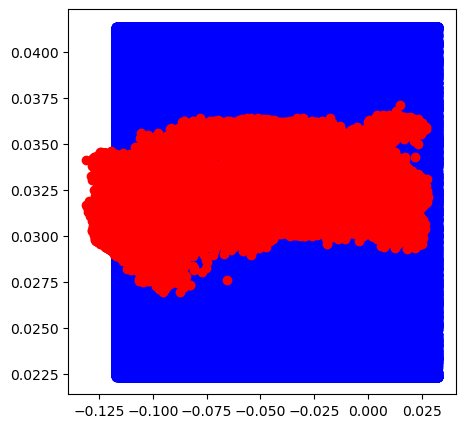

In [45]:
fig, ax6= plt.subplots(figsize=(5,5))

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')

plt.savefig('./Ridge Model plot(#100).png', dpi=1200)

# 7 Using SVR

In [46]:
from sklearn.svm import SVR

model4= SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

model4.get_params

model4.fit(X_train, y_train.iloc[:, 0]) # can not capture the 2D array of y, it can predict for 1D

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [47]:
y_train.iloc[:, 0]

206759    -0.108972
1496358   -0.084143
235984    -0.027211
1917219   -0.047574
1233298    0.019445
             ...   
110268    -0.096571
1692743    0.011038
2356330   -0.085467
2229084   -0.067794
2219110   -0.011003
Name: Parcel Centroid[X] (m), Length: 2113137, dtype: float64

In [48]:
y_train.iloc[:, 0].shape

(2113137,)

In [49]:
y_train.shape

(2113137, 3)

In [50]:
model4.score(X_test, y_test.iloc[:,:1])

-0.06814842523438736

In [51]:
ySVR_preds=model4.predict(X_test)
ySVR_preds

array([-0.04227082, -0.04227082, -0.04227082, ..., -0.04227082,
       -0.04227082, -0.04227082])

In [52]:
pd.DataFrame(ySVR_preds)

,0
0,-0.042271
1,-0.042271
2,-0.042271
3,-0.042271
4,-0.042271
...,...
528280,-0.042271
528281,-0.042271
528282,-0.042271
528283,-0.042271


In [53]:
y_test.iloc[:,0]

412383     0.031502
541694    -0.049162
2308287    0.007145
2551475    0.017912
1094681   -0.066240
             ...   
179283    -0.079945
101560    -0.049620
2305778    0.000587
1705144   -0.057399
1445684    0.024550
Name: Parcel Centroid[X] (m), Length: 528285, dtype: float64

# 8.0 Comparing all the Regression Models

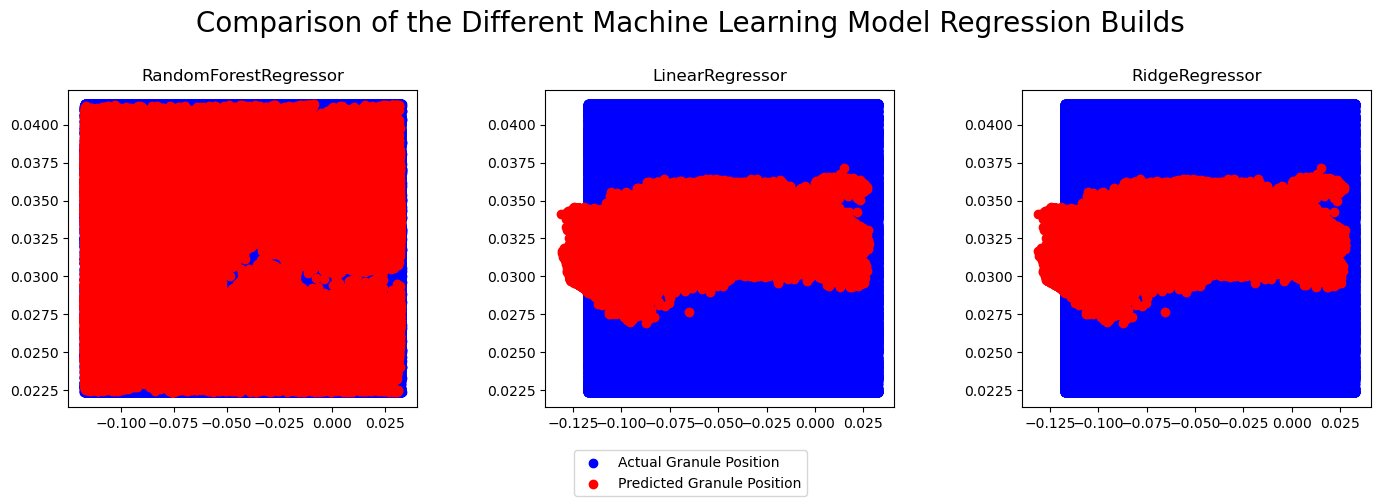

In [54]:
fig, (ax3, ax5, ax6) =plt.subplots(1,3,figsize=(15,5))


l1=ax3.scatter(actual_Xi, actual_Xj, color ='blue')
l2=ax3.scatter(predicted_Xi, predicted_Xj, color='red')
ax3.set(title='RandomForestRegressor')

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')
ax5.set(title='LinearRegressor')

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')
ax6.set(title='RidgeRegressor')

fig.tight_layout(pad=5.0)
fig.legend(['Actual Granule Position', 'Predicted Granule Position'], loc='lower center')
fig.suptitle('Comparison of the Different Machine Learning Model Regression Builds', fontsize=20)
plt.savefig('./Comparison of the Different Machine Learning Model Regression Builds(#100).png', dpi=1200)

In [55]:
model1_scores={}
model2_scores={}
model3_scores={}

for key,value in metrics.items():
    model1_scores[key]=value(y_test, y_preds)
    model2_scores[key]=value(y_test, yLinear_Preds)
    model3_scores[key]=value(y_test, yRidge_preds)

  


score30_table= pd.DataFrame(model1_scores.values(),  columns=['RandomForestRegression'], index= model1_scores.keys())
score30_table['LinearRegression']= model2_scores.values()
score30_table['RidgeRegression'] = model3_scores.values()

score100_table.to_csv('#100scores.csv')

score100_table

,Values,LinearRegression,RidgeRegression
r-squared,0.886260,0.553530,0.553526
Mean absolute error (MAE),0.001389,0.003346,0.003346
Mean squared error(MSE),0.000004,0.000018,0.000018


# RandomSearchCV

In [56]:
# %%time

# from sklearn.model_selection import RandomizedSearchCV

# RndmFrst_grid={"n_estimators": np.arange(10,100,10),
#                "max_depth":[None]
#               }

# RndmSrch_RndmFrst=RandomizedSearchCV(RandomForestRegressor(),
#                               param_distributions= RndmFrst_grid,
#                               cv=5,
#                               verbose= 10
#                              )
# RndmSrch_RndmFrst.fit(X_train, y_train)

In [57]:
# RndmSrch_RndmFrst.best_params_

In [58]:
# %%time

# from sklearn.model_selection import GridSearchCV

# GridSrch_RndmFrst= GridSearchCV(RandomForestRegressor(),
#                                 param_grid=RndmFrst_grid,
#                                 cv=5,
#                                 verbose=10)
# GridSrch_RndmFrst.fit(X_train, y_train)

In [59]:
# GridSrch_RndmFrst.best_params_

## Making Use of the RandomizedSearchCV RandomForest Best_params for predicting our data

In [60]:
improved_model1=RandomForestRegressor(90,max_depth=None)
improved_model1

improved_model1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=90)

In [61]:
improvedModel_yPreds=improved_model1.predict(X_test)
improvedModel_yPreds

array([[ 0.02997901,  0.03482515,  0.00241222],
       [-0.04852312,  0.0347216 ,  0.00729677],
       [ 0.0089019 ,  0.0263193 ,  0.005287  ],
       ...,
       [ 0.00175076,  0.03526093,  0.0006652 ],
       [-0.05860064,  0.02845987,  0.00218127],
       [ 0.02136758,  0.03509436,  0.00354683]])

# Evaluating the tuned model

 *The problem in question is that of regression and not classification, so we need to use the Regression metrics.
    https://scikit-learn.org/stable/modules/model_evaluation.html
    * The metrics used in this study are:
            > R-squared score (r-squared)
            > Mean absolute error (MAE)
            > Mean squared error (MSE)
            > Root mean squared error (RMSE)
            > Max error
            

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error
         }

Improved_model1_scores={}

for key,value in metrics.items():
   Improved_model1_scores[key]= value(y_test, improvedModel_yPreds).astype("float")

Improved_model1_scores

{'r-squared': 0.8862672448531237,
 'Mean absolute error (MAE)': 0.0013894563451159105,
 'Mean squared error(MSE)': 4.073183583933314e-06}

# Comparing these values with the values obtained before Tuning the Machine learning model

Recalling the score values of both models

In [63]:
model1_scores

{'r-squared': 0.88625952668291,
 'Mean absolute error (MAE)': 0.0013891598366113965,
 'Mean squared error(MSE)': 4.072962682930386e-06}

In [64]:
Improved_model1_scores

{'r-squared': 0.8862672448531237,
 'Mean absolute error (MAE)': 0.0013894563451159105,
 'Mean squared error(MSE)': 4.073183583933314e-06}

## Finding the Difference

In [65]:
score_differences=(np.array(list(Improved_model1_scores.values()))-np.array(list(model1_scores.values())))
score_differences

array([7.71817021e-06, 2.96508505e-07, 2.20901003e-10])

## Showing the difference in a table

In [66]:
pd.DataFrame([score_differences] ,columns=[['R-squared diff','Mean absolute error (MAE) diff' ,'Mean squared error(MSE) diff']])

,R-squared diff,Mean absolute error (MAE) diff,Mean squared error(MSE) diff
0,0.000008,2.965085e-07,2.209010e-10


# Performing Feature Importance
    Feature importance is a model inspection technique that measures the contribution of each feature to a fitted model's statistical performance on a given tabular dataset .

In [67]:
feature_importance = improved_model1.feature_importances_
feature_importances= feature_importance[:20]

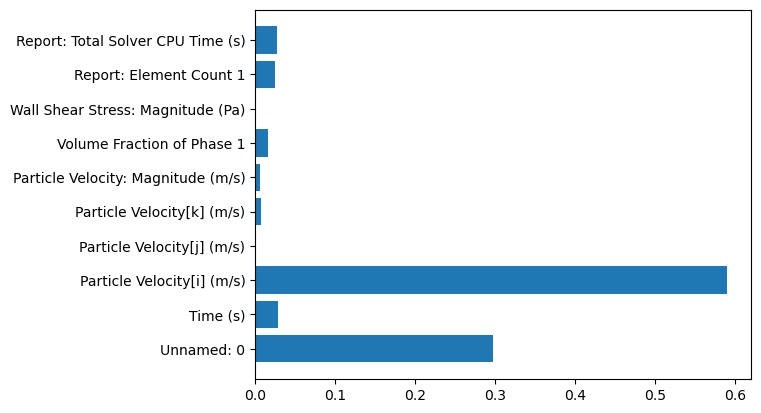

In [68]:
plt.barh( X_train.columns, feature_importances)
plt.savefig('./Graph Showing Feature Importance(#100).pdf', dpi=1200, format= 'pdf')

# Predicting the velocity

In [69]:
U=Granular_flow_data.drop(["Parcel Centroid[X] (m)", "Parcel Centroid[Y] (m)", "Parcel Centroid[Z] (m)", "Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)", "Particle Velocity: Magnitude (m/s)"], axis=1)
U

,Unnamed: 0,Time (s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s),X (m),Y (m),Z (m)
0,0,0.02,0.010824,0,1128,5.851,-0.113685,0.032540,0.014828
1,1,0.02,0.006975,0,1128,5.851,-0.113686,0.025651,0.007872
2,2,0.02,0.010824,0,1128,5.851,-0.113689,0.024866,0.018086
3,3,0.02,0.034522,0,1128,5.851,-0.113687,0.038670,0.008284
4,4,0.02,0.010824,0,1128,5.851,-0.113689,0.026663,0.013483
...,...,...,...,...,...,...,...,...,...
2641417,30668,2.00,0.085416,0,30673,10843.272,-0.117250,0.034019,0.007598
2641418,30669,2.00,0.085416,0,30673,10843.272,-0.117254,0.029126,0.007375
2641419,30670,2.00,0.049209,0,30673,10843.272,-0.117258,0.035297,0.015387
2641420,30671,2.00,0.163638,0,30673,10843.272,-0.117258,0.026099,0.002817


In [70]:
U["Wall Shear Stress: Magnitude (Pa)"].describe()

count    2641422.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Wall Shear Stress: Magnitude (Pa), dtype: float64

In [71]:
v=Granular_flow_data[["Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)"]]
v

,Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s)
0,0.576229,7.599137e-06,-0.156682
1,0.575964,-3.384995e-05,-0.156740
2,0.576129,8.063311e-05,-0.156886
3,0.576709,-4.113741e-04,-0.155926
4,0.576153,3.311456e-05,-0.156845
...,...,...,...
2641417,0.538821,-1.702028e-07,-0.108070
2641418,0.538780,-1.942652e-07,-0.108018
2641419,0.538740,-2.003241e-08,-0.107967
2641420,0.538740,-4.235156e-08,-0.107966


In [74]:
# %%time

# U_train, U_test, v_train, v_test=train_test_split(U,v,
#                                                   test_size=0.2, 
#                                                   random_state=42)

# velocity_model1= RandomForestRegressor(n_estimators=200)
# velocity_model1.fit(U_train, v_train)

In [75]:
# velocity_model1.score(U_test, v_test)

# Using Multi-layer Percerptron Regressor (MLP Regressor)

In [76]:
# %%time

# from sklearn.neural_network import MLPRegressor


# MLP= MLPRegressor(random_state=42)

# MLP.fit(U_train, v_train)

In [77]:
# MLP.score(X=U_test,y=v_test)

## Exporting the y_test and the RandomForestRegressor Predicted data (y_preds)

In [78]:
test_n_predicted_data=pd.DataFrame(np.array(y_test), columns=['y_test(i)','y_test(j)', 'y_test(k)'])

test_n_predicted_data[['y_preds(i)', 'y_preds(j)', 'y_preds(k)']]=np.array(y_preds)

test_n_predicted_data.to_csv('./test_n_predicted_data(#100).csv', index=False)

test_n_predicted_data

,y_test(i),y_test(j),y_test(k),y_preds(i),y_preds(j),y_preds(k)
0,0.031502,0.033440,0.002208,0.029320,0.034945,0.002347
1,-0.049162,0.029499,0.007040,-0.048454,0.035142,0.007159
2,0.007145,0.025976,0.005395,0.008948,0.026167,0.005346
3,0.017912,0.026251,0.003920,0.019014,0.024825,0.004230
4,-0.066240,0.033535,0.008997,-0.067198,0.032203,0.008307
...,...,...,...,...,...,...
528280,-0.079945,0.034668,0.009816,-0.080161,0.032603,0.009480
528281,-0.049620,0.037336,0.003339,-0.050342,0.034435,0.003297
528282,0.000587,0.034223,0.000501,0.001741,0.035585,0.000699
528283,-0.057399,0.027527,0.003134,-0.058650,0.028457,0.002157


## Difference Between the y_test (Actual data) and the y_preds (Predicted Data )

In [79]:
dataDifference = np.array(y_test)-np.array(y_preds)
df_dataDifference=pd.DataFrame(dataDifference, columns=['y_test(i) - y_preds(i)', 'y_test(j) - y_preds(j)', 'y_test(k) - y_preds(k)'])
df_dataDifference

,y_test(i) - y_preds(i),y_test(j) - y_preds(j),y_test(k) - y_preds(k)
0,0.002182,-0.001505,-0.000139
1,-0.000708,-0.005642,-0.000120
2,-0.001803,-0.000191,0.000049
3,-0.001102,0.001426,-0.000310
4,0.000958,0.001333,0.000690
...,...,...,...
528280,0.000216,0.002065,0.000336
528281,0.000721,0.002900,0.000041
528282,-0.001154,-0.001362,-0.000197
528283,0.001251,-0.000930,0.000977


*The dataDifference is approximately equal to zero, this is better seen when the values are rounded to 3 decimal places as shown below

In [80]:
df_dataDifference.round(3)

,y_test(i) - y_preds(i),y_test(j) - y_preds(j),y_test(k) - y_preds(k)
0,0.002,-0.002,-0.000
1,-0.001,-0.006,-0.000
2,-0.002,-0.000,0.000
3,-0.001,0.001,-0.000
4,0.001,0.001,0.001
...,...,...,...
528280,0.000,0.002,0.000
528281,0.001,0.003,0.000
528282,-0.001,-0.001,-0.000
528283,0.001,-0.001,0.001


## Exporting the dataDifference

In [81]:
df_dataDifference.to_csv('difference btw y_test and y_preds(#100).csv', index=False)

## Exporting the Training Data (X_train and y_train)

In [82]:
TrainingData = X_train
TrainingData[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]=y_train
TrainingData

,Unnamed: 0,Time (s),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s),Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
206759,18593,0.38,0.624326,-0.000049,-0.216191,0.660698,0.162017,0,20921,831.111,-0.108972,0.024604,0.008159
1496358,21873,1.26,0.705964,-0.015627,-0.024537,0.706563,0.149046,0,30673,6134.646,-0.084143,0.034701,0.004505
235984,4862,0.42,1.027998,-0.017445,-0.053750,1.029550,0.038313,0,23127,1012.077,-0.027211,0.037417,0.005829
1917219,13115,1.54,0.745870,-0.010373,-0.065553,0.748817,0.159320,0,30718,7927.276,-0.047574,0.023127,0.003724
1233298,4279,1.10,1.079409,0.004584,-0.017984,1.079568,0.119247,0,30679,5116.494,0.019445,0.029986,0.007202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,10129,0.28,0.731843,-0.000075,-0.352359,0.812250,0.107464,0,15406,456.199,-0.096571,0.036543,0.012349
1692743,3510,1.40,0.976007,-0.002792,-0.029698,0.976463,0.118693,0,30681,7031.006,0.011038,0.031379,0.002928
2356330,21954,1.82,0.694416,0.028030,-0.004786,0.694998,0.163251,0,30743,9708.255,-0.085467,0.029363,0.002927
2229084,17744,1.74,0.689450,0.033427,-0.042708,0.691580,0.163489,0,30760,9195.825,-0.067794,0.025219,0.001993


In [83]:
TrainingData.to_csv('./Training_Data(#100).csv', index=False)

## Exporting X_test

In [84]:
Xtest=X_test
Xtest.to_csv('./X_test(#100).csv')

## Exporting y_test

In [85]:
Ytest=y_test
Ytest.to_csv('./y_test(#100).csv')

## Exporting both X_test and y_test as a combined file

In [86]:
Xtest[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]=Ytest

Xtest.to_csv('./X_test and y_test(#100).csv')

## Saving the Trained machine Learning model to a file

In [87]:
import joblib


joblib.dump(model1, './saved_RandomFrstRegrsor_model100.pkl') #RandomForestRegressor
joblib.dump(model2, './saved_LinearRegrsor_model100.pkl') #LinearRegressor
joblib.dump(model3, './saved_RidgeRegrsor_model100.pkl') #RidgeRegressor

['./saved_RidgeRegrsor_model100.pkl']

In [88]:
from datetime import datetime


print(f"This notebook code was last run on {datetime.now()}")

This notebook code was last run on 2024-07-16 00:17:56.277353
